In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px

## Getting and Cleansing the Data

Dataset can be found [here](https://www.kaggle.com/datasets/budnyak/wine-rating-and-price/data).

In [34]:
data = pd.read_csv('archive (2)/Red.csv')
data

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016
...,...,...,...,...,...,...,...,...
8661,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016
8662,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016
8663,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010
8664,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019


In [5]:
# Slicing the data 
sliced_data = data.sample(n=1000)
sliced_data

Is there a correlation between the price of the wine and its rating? 

In [7]:
# Checking for missing values
list_of_cols = ['Rating', 'Price']

for col in list_of_cols:
    for value in col:
        if value == float("nan"):
            print(f"It's pd.isna  : {pd.isna(x)}")

## Analysing the Data

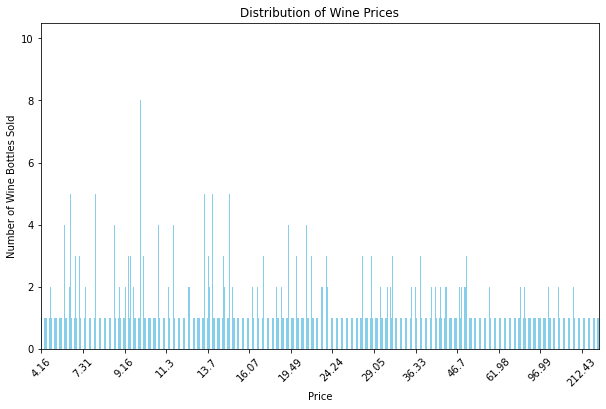

In [23]:
# Exploring the distribution of the price 
plt.figure(figsize=(10, 6))
price_counts = sliced_data['Price'].value_counts().sort_index()
price_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Price')
plt.ylabel('Number of Wine Bottles Sold')
plt.title('Distribution of Wine Prices')
plt.xticks(range(0, len(price_counts), 50), price_counts.index[::50], rotation=45)

plt.show()

In [35]:
# Filtering the data
sliced_filtered_data = sliced_data[sliced_data['Price'] < 100]
sliced_filtered_data

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
2805,Montepulciano d'Abruzzo 2017,Italy,Montepulciano d'Abruzzo,Moncaro,3.2,242,6.00,2017
8412,Le Clos Guillot Chinon 2017,France,Chinon,Bernard Baudry,3.9,93,21.74,2017
4676,Conciso Tinto 2015,Portugal,Dão,Niepoort,3.8,37,18.73,2015
994,Compleo Cuvée Noire 2018,Switzerland,Zürich,Staatskellerei Zürich,3.9,134,17.06,2018
4525,Alentejano Tinto 2018,Portugal,Alentejano,Fitapreta,4.0,359,11.70,2018
...,...,...,...,...,...,...,...,...
2863,Haut-Médoc 2011,France,Haut-Médoc,Château Saint-Ahon,3.9,246,16.47,2011
7017,Cabernet Sauvignon 2014,South Africa,Stellenbosch,Kanonkop,4.2,648,30.50,2014
2493,Esperado Shiraz - Malbec 2014,Argentina,Tulum Valley,Callia,3.3,215,7.00,2014
2665,Lagrein 2018,Italy,Südtirol - Alto Adige,Kurtatsch (Cortaccia),3.7,230,16.55,2018


## Building a Linear Regression Model 

In [26]:
# Renaming columns
sliced_filtered_data = sliced_filtered_data.rename(columns={'Rating': 'Y', 'Price': 'X'})

In [27]:
# Converting X and Y to floats 
sliced_filtered_data['X'] = sliced_filtered_data['X'].astype(float)
sliced_filtered_data['Y'] = sliced_filtered_data['Y'].astype(float)

In [28]:
# Calculating mean and variance
mean_x = np.mean(sliced_filtered_data['X'])
mean_y = np.mean(sliced_filtered_data['Y'])

var_x = np.var(sliced_filtered_data['X'])
var_y = np.var(sliced_filtered_data['Y'])


print('x stats: mean= %.3f   variance= %.3f' % (mean_x, var_x))
print('y stats: mean= %.3f   variance= %.3f' % (mean_y, var_y))

x stats: mean= 24.864   variance= 415.961
y stats: mean= 3.855   variance= 0.079


In [29]:
# Calculating covariance between x and y
def covariance(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar/len(x)

covar_xy = covariance(sliced_filtered_data['X'].tolist(), sliced_filtered_data['Y'].tolist())
print(f'Cov(X,Y): {covar_xy}')

Cov(X,Y): 3.5635644659961416


In [30]:
# Estimating coefficients
b1 = covar_xy / var_x
b0 = mean_y - b1 * mean_x

print(f'Coefficents:\n b0: {b0}  b1: {b1} ')

Coefficents:
 b0: 3.6421103235494066  b1: 0.00856706467389951 


In [33]:
# Making Predictions
x = sliced_filtered_data['X'].values.copy()
# x.sort()

# Predicting the new data based on calculated coeffiecents 
y_hat = b0 + b1 * x

y = sliced_filtered_data['Y'].values

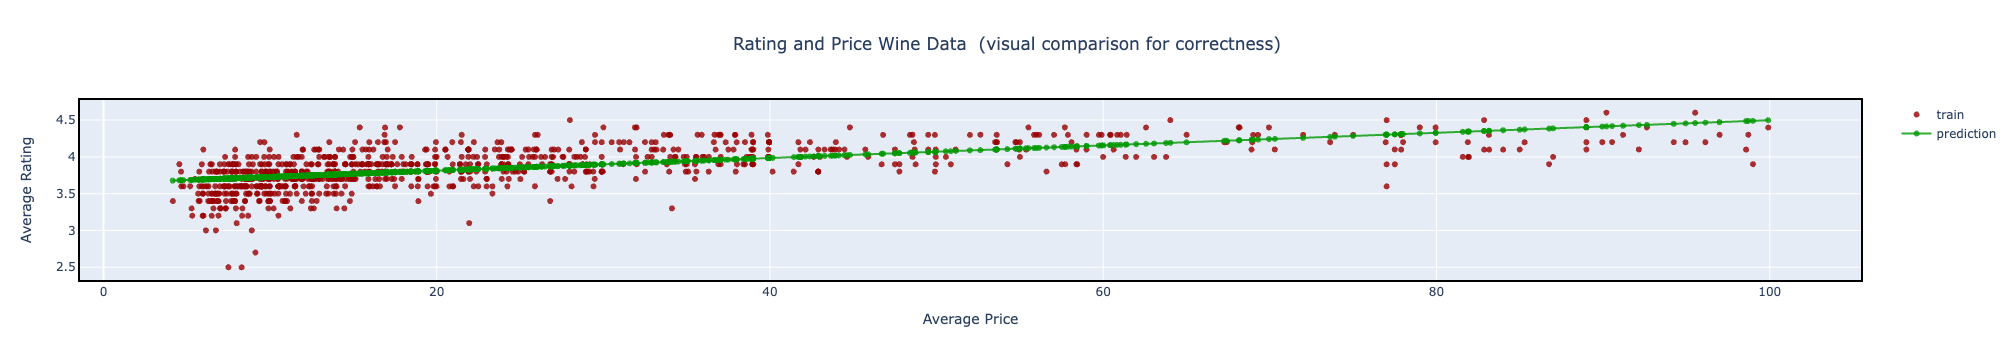

In [32]:
# Making visual comparison for correctness
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=sliced_filtered_data['X'], y=sliced_filtered_data['Y'], name='train', mode='markers', marker_color='rgba(152, 0, 0, .8)'))
fig.add_trace(go.Scatter(x=sliced_filtered_data['X'], y=y_hat, name='prediction', mode='lines+markers', marker_color='rgba(0, 152, 0, .8)'))

fig.update_layout(title = f'Rating and Price Wine Data\n (visual comparison for correctness)',title_x=0.5, xaxis_title= "Average Price", yaxis_title="Average Rating")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()